In [1]:
import abundance_matching

import betterplotlib as bpl
from astropy import table
import numpy as np
import re

bpl.presentation_style()

In [2]:
bpl.presentation_style()

In [3]:
u = abundance_matching.UniverseMachine(1E12, 1E11, 0)

In [4]:
u.data_dir + "smfs"

'/Users/gillenb/code/abundance_matching/abundance_matching/data/universe_machine/data/smfs'

In [5]:
u.smhm_table['1.002312']

HM(0),Med_All(1),Err+(2),Err-(3),Med_Cen(4),Err+(5),Err-(6),Med_Cen_SF(7),Err+(8),Err-(9),Med_Cen_Q(10),Err+(11),Err-(12),Med_Sat(13),Err+(14),Err-(15),Med_SF(16),Err+(17),Err-(18),Med_Q(19),Err+(20),Err-(21),True_Med_All(22),Err+(23),Err-(24),True_Cen(25),Err+(26),Err-(27),True_Cen_SF(28),Err+(29),Err-(30),True_Cen_Q(31),Err+(32),Err-(33),True_Sat(34),Err+(35),Err-(36),True_SF(37),Err+(38),Err-(39),True_Q(40),Err+(41),Err-(42)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
9.1,-4.494999,4.494999,0.0,-4.494999,4.494999,0.0,-4.494999,4.494999,0.0,0.0,0.0,0.0,0.0,0.0,4.494996,-4.494999,4.494999,0.0,0.0,0.0,0.0,-4.494999,4.494999,0.0,-4.494999,4.494999,0.0,-4.494999,4.494999,0.0,0.0,0.0,0.0,0.0,0.0,4.494996,-4.494999,4.494999,0.0,0.0,0.0,0.0
9.3,-4.494998,1.2e-05,2e-06,-4.494998,1.1e-05,1e-06,-4.494998,1.1e-05,1e-06,-4.494263,4.494263,0.00069,-4.494992,2.6e-05,5e-06,-4.494998,1.3e-05,2e-06,-4.494174,4.494174,0.000779,-4.494998,9e-06,2e-06,-4.494998,8e-06,1e-06,-4.494998,1.1e-05,2e-06,-4.494128,4.494128,0.000827,-4.494996,2e-05,1e-06,-4.494998,1.2e-05,2e-06,-4.494178,4.494178,0.000779
9.5,-4.494905,0.000248,7.2e-05,-4.494913,0.000234,6.5e-05,-4.494921,0.000237,6.3e-05,-4.492802,4.492802,0.0017,-4.4948,0.000502,0.000153,-4.49491,0.00025,7.1e-05,-4.492906,1.132906,0.001575,-4.494913,0.000188,7e-05,-4.494921,0.000167,6.4e-05,-4.494929,0.000168,6.1e-05,-4.492776,4.492776,0.001693,-4.494817,0.000389,0.000146,-4.494919,0.000184,6.9e-05,-4.492835,4.492835,0.001634
9.7,-4.461691,0.074112,0.031896,-4.464714,0.068202,0.02896,-4.46514,0.066608,0.02858,-4.067621,0.515715,0.234965,-4.384753,0.136333,0.079605,-4.462125,0.072599,0.031514,-4.068707,0.511458,0.231571,-4.463289,0.049072,0.030662,-4.466269,0.045802,0.027748,-4.466697,0.045728,0.027367,-4.070182,0.516056,0.233225,-4.387415,0.09573,0.088964,-4.463726,0.048825,0.030272,-4.071117,0.526894,0.231697
9.9,-3.789787,0.103411,0.201411,-3.813251,0.102545,0.204792,-3.814991,0.103267,0.205705,-3.526384,0.301242,0.184669,-3.592118,0.080986,0.180716,-3.791706,0.102924,0.201887,-3.492774,0.289124,0.179642,-3.79426,0.070513,0.2575,-3.817855,0.069741,0.261002,-3.819667,0.070957,0.261865,-3.52729,0.287128,0.192049,-3.595227,0.06065,0.234295,-3.796223,0.07215,0.261065,-3.493212,0.292764,0.18859
10.1,-3.374289,0.04297,0.170815,-3.401626,0.043973,0.173078,-3.402734,0.044818,0.171419,-3.223874,0.167977,0.132328,-3.208457,0.044869,0.147945,-3.376028,0.043244,0.169588,-3.165777,0.186321,0.132243,-3.379339,0.036633,0.208364,-3.40636,0.034574,0.212059,-3.407479,0.035323,0.212327,-3.232202,0.172403,0.148271,-3.213817,0.039357,0.189278,-3.381106,0.03692,0.210836,-3.173654,0.199376,0.131137
10.3,-3.13622,0.023013,0.152712,-3.167731,0.021709,0.156777,-3.169031,0.021883,0.155809,-3.038357,0.108789,0.110581,-2.9861,0.021593,0.13448,-3.13876,0.022353,0.153695,-2.96474,0.18757,0.111049,-3.141433,0.018872,0.193938,-3.172791,0.016476,0.200985,-3.174077,0.01675,0.19977,-3.045682,0.112787,0.144055,-2.991092,0.020428,0.179039,-3.143972,0.020244,0.192003,-2.972538,0.185967,0.103469
10.5,-2.930211,0.0,0.136239,-2.964034,-0.002026,0.141237,-2.965317,-0.001994,0.14101,-2.881353,0.09183,0.092084,-2.785308,0.001656,0.114646,-2.933907,0.0,0.135299,-2.775238,0.211621,0.101775,-2.934972,0.007893,0.18074,-2.968697,0.007662,0.188677,-2.969951,0.008138,0.189019,-2.890918,0.089573,0.118542,-2.790143,0.013724,0.158838,-2.938714,0.007076,0.182201,-2.780872,0.221182,0.093885
10.7,-2.740482,-0.014568,0.110318,-2.782,-0.017277,0.119456,-2.783359,-0.016172,0.119637,-2.72226,0.084219,0.08736,-2.577202,-0.003634,0.082211,-2.746782,-0.015158,0.110933,-2.580641,0.173739,0.074911,-2.745738,0.001528,0.160136,-2.787058,0.00129,0.173833,-2.788343,0.000441,0

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


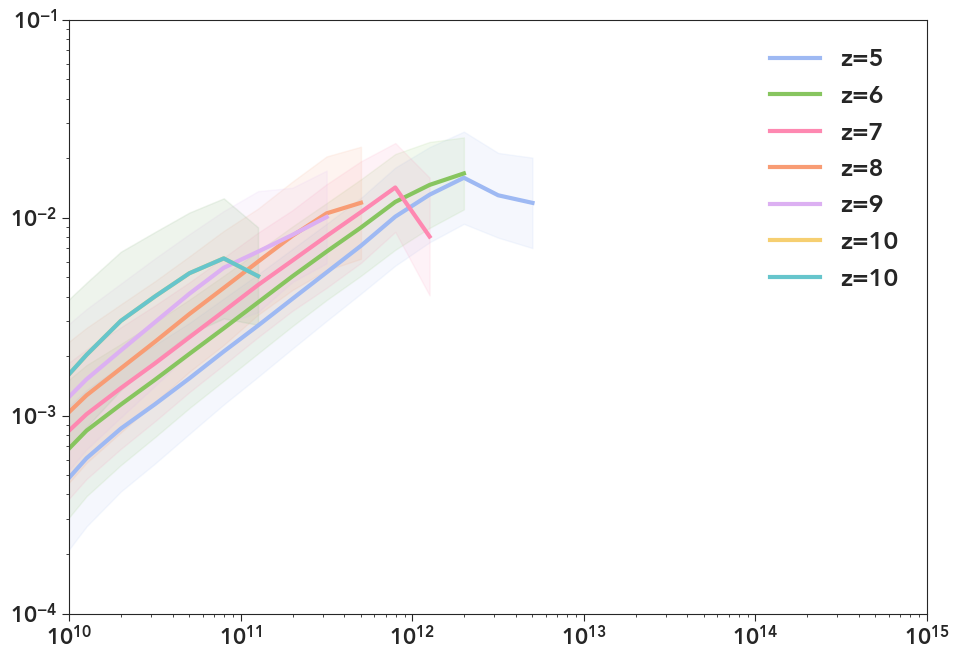

In [6]:
fig, ax = bpl.subplots()

for idx, z in enumerate(np.arange(5, 12)):
    z_smhm, masses, smhm, hi_lim, lo_lim = u.get_smhm(z, "All")
    
    ax.plot(masses, smhm, label="z={:.0f}".format(z_smhm), c=bpl.color_cycle[idx])
    ax.fill_between(x=masses, y1=lo_lim, y2=hi_lim, color=bpl.color_cycle[idx], alpha=0.1)
    ax.set_xscale("log")
    ax.set_yscale("log")
    
    ax.legend()
    ax.set_limits(1E10, 1E15, 0.0001, 0.1)

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


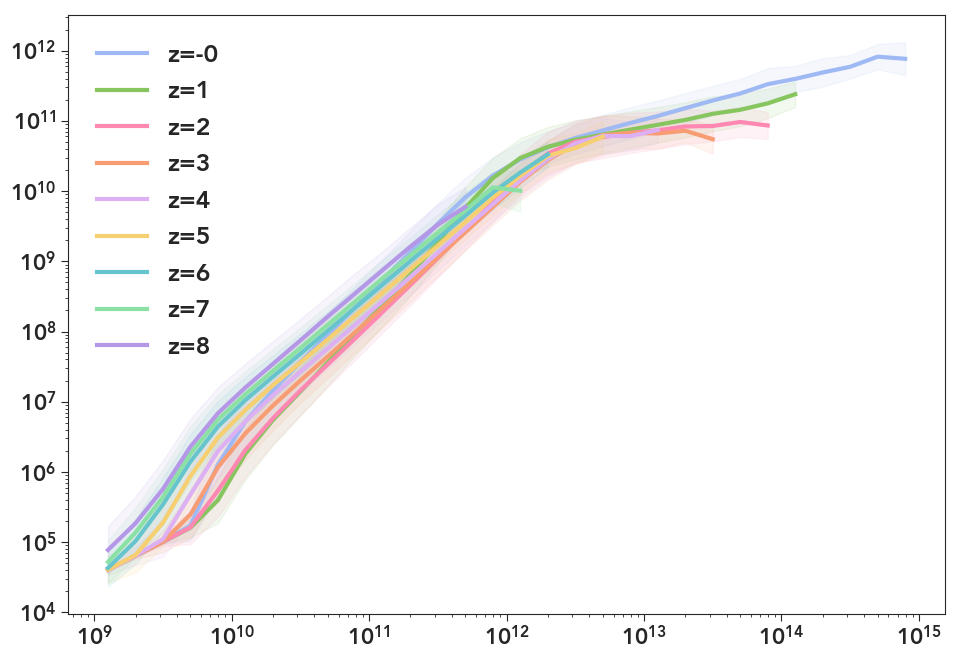

In [7]:
fig, ax = bpl.subplots()

for idx, z in enumerate(np.arange(0, 9)):
    z_smhm, masses, smhm, hi_lim, lo_lim = u.get_smhm(z, "All")
    
    s_mass = masses * smhm
    sm_up = masses * hi_lim
    sm_down = masses * lo_lim
    
    ax.plot(masses, s_mass, label="z={:.0f}".format(z_smhm), c=bpl.color_cycle[idx])
    ax.fill_between(x=masses, y1=sm_down, y2=sm_up, color=bpl.color_cycle[idx], alpha=0.1)
    ax.set_xscale("log")
    ax.set_yscale("log")
    
    ax.legend()

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


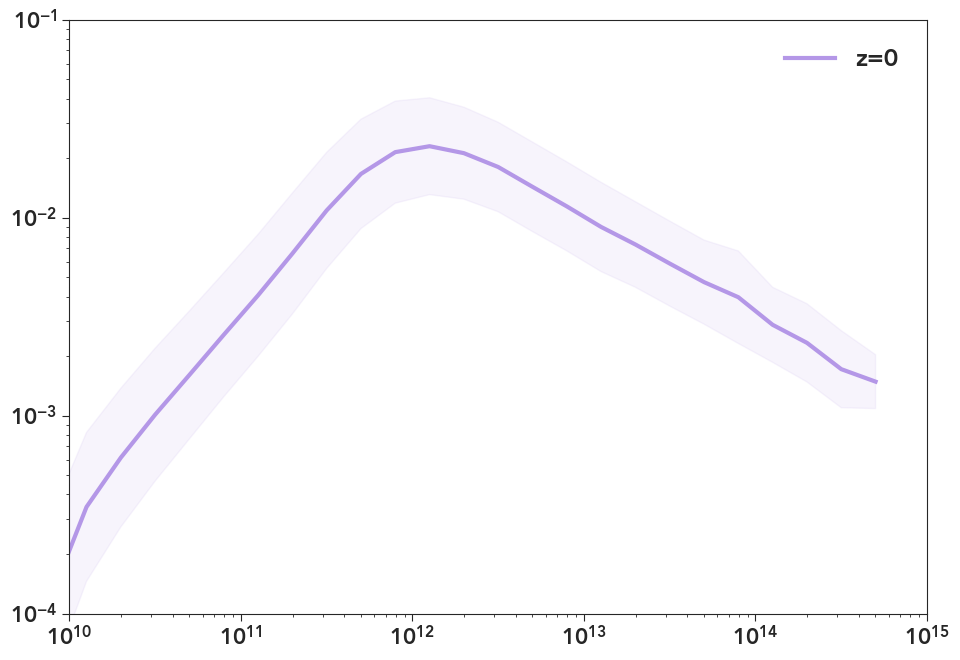

In [8]:
fig, ax = bpl.subplots()

z_smhm, masses, smhm, hi_lim, lo_lim = u.get_smhm(0.1, "All")

ax.plot(masses, smhm, label="z={:.0f}".format(z_smhm), c=bpl.color_cycle[idx])
ax.fill_between(x=masses, y1=lo_lim, y2=hi_lim, color=bpl.color_cycle[idx], alpha=0.1)
ax.set_xscale("log")
ax.set_yscale("log")

ax.legend()
ax.set_limits(1E10, 1E15, 0.0001, 0.1)

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/mathtext.py:827: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


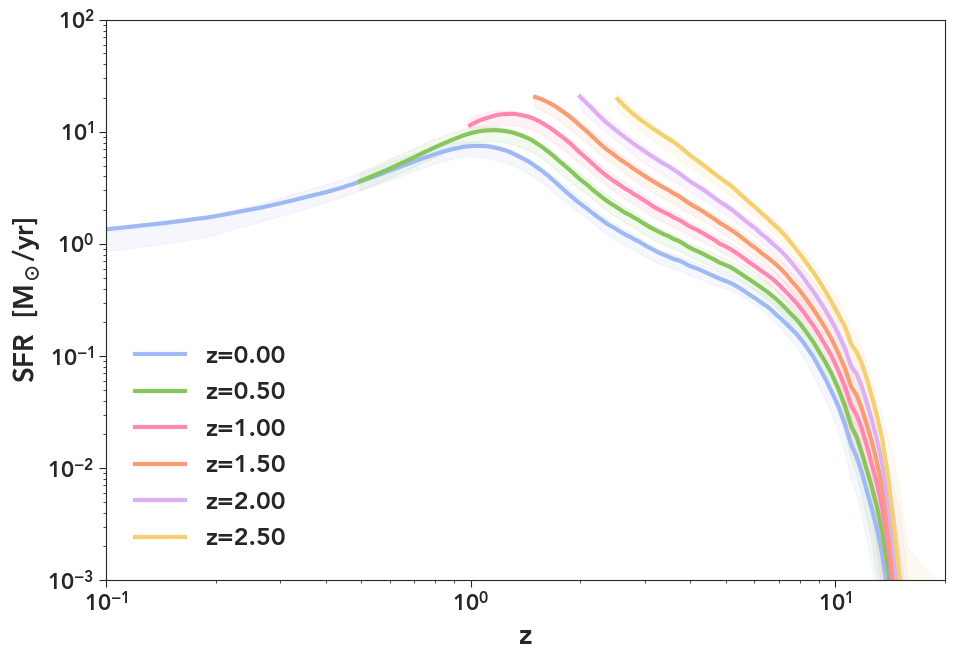

In [9]:
fig, ax = bpl.subplots()

for idx, z in enumerate(np.arange(0, 3, 0.5)):
    zs, sfhs, hi_lim, lo_lim = u.get_sfh("halo", z, 1E12)
    
    ax.plot(zs, sfhs, label="z={:.2f}".format(z), c=bpl.color_cycle[idx])
    ax.fill_between(x=zs, y1=lo_lim, y2=hi_lim, color=bpl.color_cycle[idx], alpha=0.1)
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_limits(0.1, 20, 0.001, 100)
    ax.add_labels("z", "SFR  [$M_\odot$/yr]")
    
    ax.legend()

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/mathtext.py:827: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


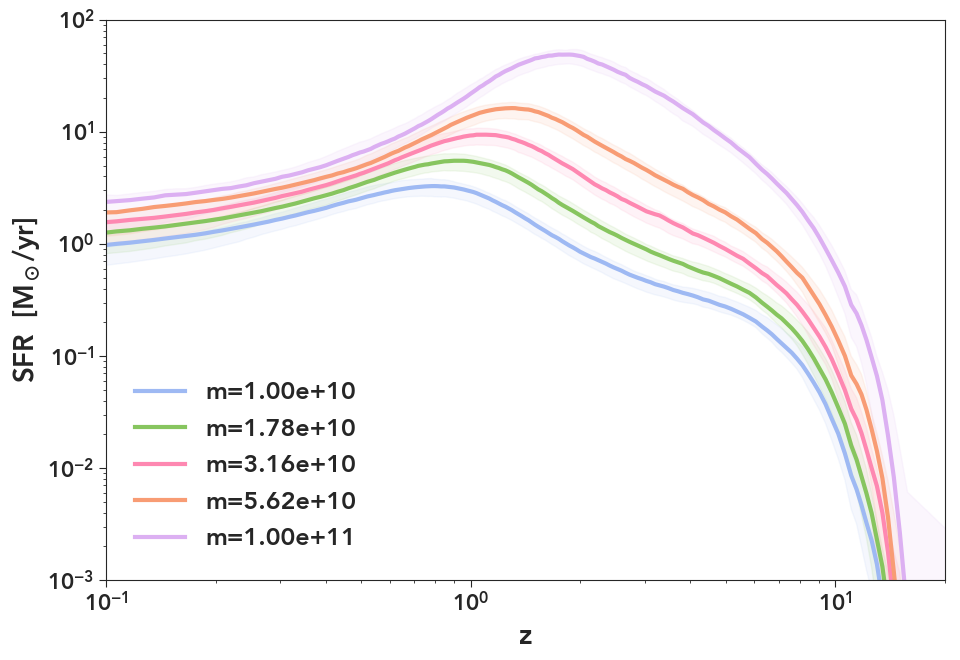

In [10]:
fig, ax = bpl.subplots()

for idx, m in enumerate(np.logspace(10, 11, 5)):
    zs, sfhs, hi_lim, lo_lim = u.get_sfh("stellar", 0, m)
    
    ax.plot(zs, sfhs, label="m={:.2e}".format(m), c=bpl.color_cycle[idx])
    ax.fill_between(x=zs, y1=lo_lim, y2=hi_lim, color=bpl.color_cycle[idx], alpha=0.1)
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_limits(0.1, 20, 0.001, 100)
    ax.add_labels("z", "SFR  [$M_\odot$/yr]")
    
    ax.legend()